# Obce z lokalit

In [1]:
import numpy as np
import pandas as pd
lokality = pd.read_csv('eru_ceny_tepla_2018.csv')
lokality.shape

(3098, 33)

In [2]:
lokality.head()

,Unnamed: 0,lokalita,kraj,pod_uhli,pod_plyn,pod_bio,pod_olej,pod_ost,vykon,pocet_odberat,...,blok_kot_czk,blok_kot_gj,sek_rozv_czk,sek_rozv_gj,dps_czk,dps_gj,dom_kot_czk,dom_kot_gj,dod_cena,dod_mnozstvi
0,0,Abertamy,K,0.0,1.0,0.0,0.0,0.0,0.810,2,...,570.27,1139.0,0.0,0.0,0.00,0.0,0.00,0.0,570.27,1764.0
1,1,Adamov,B,0.0,1.0,0.0,0.0,0.0,2.203,1,...,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,224.94,22964.0
2,2,Adamov - Opletalova 38 a 22,B,0.0,1.0,0.0,0.0,0.0,0.460,2,...,0.00,0.0,0.0,0.0,0.00,0.0,662.43,1382.0,662.43,1382.0
3,3,Adamov - P. Jilemnického 18 (K 72),B,0.0,1.0,0.0,0.0,0.0,0.090,1,...,0.00,0.0,0.0,0.0,0.00,0.0,324.49,514.0,324.49,514.0
4,4,Adamov - teplovodní zdroj,B,0.0,1.0,0.0,0.0,0.0,9.000,37,...,0.00,0.0,0.0,0.0,540.92,26492.0,0.00,0.0,540.92,26492.0


In [3]:
lokality.columns

Index(['Unnamed: 0', 'lokalita', 'kraj', 'pod_uhli', 'pod_plyn', 'pod_bio',
       'pod_olej', 'pod_ost', 'vykon', 'pocet_odberat', 'pocet_mist',
       'nad_10_czk', 'nad_10_gj', 'pod_10_czk', 'pod_10_gj', 'cptv_czk',
       'cptv_gj', 'prim_rozv_czk', 'prim_rozv_gj', 'cvs_czk', 'cvs_gj',
       'cvs_voda_czk', 'cvs_voda_gj', 'blok_kot_czk', 'blok_kot_gj',
       'sek_rozv_czk', 'sek_rozv_gj', 'dps_czk', 'dps_gj', 'dom_kot_czk',
       'dom_kot_gj', 'dod_cena', 'dod_mnozstvi'],
      dtype='object')

In [4]:
# Odstranit sloupec s duplicitním indexem
lokality = lokality.iloc[:, 1:]

# Obce z lokalit
lokality['obec'] = lokality.lokalita.str.split('-', 1).str.get(0).str.strip()
lokality['obec'] = lokality['obec'].replace('[0-9]*/*,*', '', regex=True).str.strip()
lokality['obec'] = lokality['obec'].str.rstrip('I*V*X*').str.strip()
lokality.obec.value_counts().size

773

In [5]:
lokality['uhli'] = lokality['pod_uhli'] * lokality['dod_mnozstvi']
lokality['plyn'] = lokality['pod_plyn'] * lokality['dod_mnozstvi']
lokality['biomasa'] = lokality['pod_bio'] * lokality['dod_mnozstvi']
lokality['olej'] = lokality['pod_olej'] * lokality['dod_mnozstvi']
lokality['ostatni'] = lokality['pod_ost'] * lokality['dod_mnozstvi']

In [6]:
columns = ['obec', 'kraj', 'dod_mnozstvi', 'dod_cena',\
           'uhli', 'plyn', 'biomasa', 'olej', 'ostatni', \
           'vykon', 'pocet_odberat', 'pocet_mist',]
lokality = lokality[columns]

In [7]:
lokality[:10]

,obec,kraj,dod_mnozstvi,dod_cena,uhli,plyn,biomasa,olej,ostatni,vykon,pocet_odberat,pocet_mist
0,Abertamy,K,1764.0,570.270000,0.0,1764.0000,0.000,0.0000,0.0,0.810,2,1
1,Adamov,B,22964.0,224.940000,0.0,22964.0000,0.000,0.0000,0.0,2.203,1,1
2,Adamov,B,1382.0,662.430000,0.0,1382.0000,0.000,0.0000,0.0,0.460,2,2
3,Adamov,B,514.0,324.490000,0.0,514.0000,0.000,0.0000,0.0,0.090,1,1
4,Adamov,B,26492.0,540.920000,0.0,26492.0000,0.000,0.0000,0.0,9.000,37,28
5,Andělská Hora,T,917.0,558.900000,0.0,917.0000,0.000,0.0000,0.0,0.192,1,1
6,Arnoltice,M,1062.0,402.550000,1062.0,0.0000,0.000,0.0000,0.0,0.180,3,2
7,Aš,K,47004.0,566.416686,0.0,46674.9720,329.028,0.0000,0.0,15.650,58,81
8,Aš,K,1496.0,536.200000,0.0,1137.1096,0.000,358.8904,0.0,0.419,3,3
9,Babice,Z,5991.0,299.680000,0.0,5991.0000,0.000,0.0000,0.0,1.290,1,1


In [8]:
def my_average(a, weights):
    """Go around a contraint of numpy.ma.average that sum of weights
    cannot be zero.
    """
    try:
        avg = sum(a * weights) / sum(weights)
    except ZeroDivisionError:
        avg = np.nan
    return avg

In [9]:
obce = pd.DataFrame()

In [10]:
obce['obec'] = lokality.groupby(by='obec')['obec'].first()
obce['kraj'] = lokality.groupby(by='obec')['kraj'].first()
obce['odberatelu'] = lokality.groupby(by='obec')['pocet_odberat'].sum()
obce['mist'] = lokality.groupby(by='obec')['pocet_mist'].sum()
obce['lokalit'] = lokality.groupby(by='obec')['pocet_odberat'].count()
obce['vykon'] = lokality.groupby(by='obec')['vykon'].sum()

In [11]:
obce['teplo_cena'] = lokality.groupby(by='obec').apply(lambda x: my_average(x['dod_cena'], weights=x['dod_mnozstvi']))
obce['teplo_mnozstvi'] = lokality.groupby(by='obec')['dod_mnozstvi'].sum()

In [12]:
obce['uhli_cena'] = lokality.groupby(by='obec').apply(lambda x: my_average(x['dod_cena'], weights=x['uhli']))
obce['uhli_mnozstvi'] = lokality.groupby(by='obec')['uhli'].sum()

In [13]:
obce['plyn_cena'] = lokality.groupby(by='obec').apply(lambda x: my_average(x['dod_cena'], weights=x['plyn']))
obce['plyn_mnozstvi'] = lokality.groupby(by='obec')['plyn'].sum()

In [14]:
obce['biomasa_cena'] = lokality.groupby(by='obec').apply(lambda x: my_average(x['dod_cena'], weights=x['biomasa']))
obce['biomasa_mnozstvi'] = lokality.groupby(by='obec')['biomasa'].sum()

In [15]:
obce['olej_cena'] = lokality.groupby(by='obec').apply(lambda x: my_average(x['dod_cena'], weights=x['olej']))
obce['olej_mnozstvi'] = lokality.groupby(by='obec')['olej'].sum()

In [16]:
obce['ostatni_cena'] = lokality.groupby(by='obec').apply(lambda x: my_average(x['dod_cena'], weights=x['ostatni']))
obce['ostatni_mnozstvi'] = lokality.groupby(by='obec')['ostatni'].sum()

In [17]:
obce = obce.reset_index(drop=True)

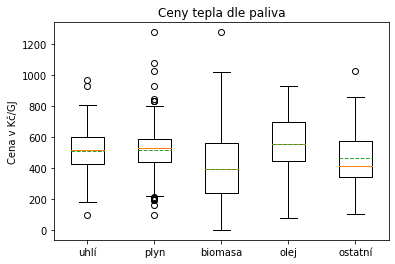

In [18]:
import matplotlib.pyplot as plt
subset = [obce[f'{col}'].dropna() for col in ['uhli_cena', 'plyn_cena', 'biomasa_cena', 'olej_cena', 'ostatni_cena']]
plt.boxplot(subset, labels=['uhlí', 'plyn', 'biomasa', 'olej', 'ostatní'], showmeans=True, meanline=True)
plt.title('Ceny tepla dle paliva')
plt.ylabel('Cena v Kč/GJ')
plt.show()

In [19]:
obce['uhli_cena'].describe()

count    176.000000
mean     512.760002
std      140.824709
min       99.913458
25%      428.372131
50%      514.748496
75%      599.847500
max      968.010000
Name: uhli_cena, dtype: float64

In [20]:
obce['plyn_cena'].describe()

count     592.000000
mean      519.100682
std       124.399261
min        99.913458
25%       437.957745
50%       528.324777
75%       587.799371
max      1279.100000
Name: plyn_cena, dtype: float64

In [21]:
obce['biomasa_cena'].describe()

count     222.000000
mean      397.634106
std       210.633190
min         0.510000
25%       242.000000
50%       395.334765
75%       559.792750
max      1279.100000
Name: biomasa_cena, dtype: float64

In [22]:
obce.to_csv('obce_2018.csv', na_rep='n/a', index=False)